In [226]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim

In [227]:
#Physics parameters

G = 6.67e-11
mT = 5.9736e24
mL = 0.07349e24
dTL = 3.844e8
w = 2.6617e-6
rT = 6.3781e6
rL = 1.7374e6

In [228]:
t = np.arange(0,1e7,1)

In [229]:
def System(R,t,G,mT,mL,dTL,w):
    
    r,phi,p_r,p_phi = R
    Delta = G*mT/dTL**3
    mu = mL/mT
    r_prima = np.sqrt(1+r**2-2*r*np.cos(phi-w*t))
    
    drdt = p_r
    dphidt = p_phi/r**2 
    dp_rdt = (p_phi**2/r**3) - Delta*(1/r**2 + (mu/r_prima**3)*(r-np.cos(phi-w*t)))
    dp_phidt = -(Delta*mu*r/r_prima**3)*np.sin(phi-w*t)
    
    return np.array([drdt,dphidt,dp_rdt,dp_phidt])

In [253]:
v_scape = 11.5e3/dTL
phi_0 = 45*np.pi/180
theta_0 = 30 *np.pi/180
r0 = 6.371e6/dTL

R0 = [r0, phi_0, v_scape*np.cos(theta_0-phi_0), v_scape*r0*np.sin(theta_0-phi_0)]

In [254]:
sol = integrate.odeint(System, R0, t, args=(G,mT,mL,dTL,w))

In [255]:
r = sol[:,0]
phi = sol[:,1]
p_r = sol[:,2]
p_phi = sol[:,3]

In [256]:
xL = dTL*np.cos(w*t)
yL = dTL*np.sin(w*t)

xT = r*np.cos(phi)*dTL
yT = r*np.sin(phi)*dTL

In [259]:
scale = 10000

<IPython.core.display.Javascript object>


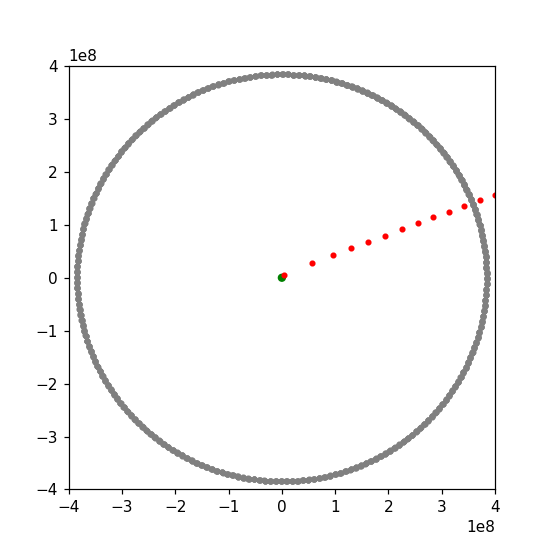

In [260]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlim(-4e8,4e8)
ax.set_ylim(-4e8,4e8)

ax.scatter(xL[::scale],yL[::scale],marker=".",color="gray")
Earth = plt.Circle((0,0),rT,color="green",fill=True)
ax.add_patch(Earth)
ax.scatter(xT[::scale],yT[::scale],marker=".",color="red")

In [200]:
xL[::100]

array([ 3.84400000e+08,  3.84399986e+08,  3.84399946e+08, ...,
       -3.40838080e+08, -3.40885378e+08, -3.40932652e+08])

<IPython.core.display.Javascript object>


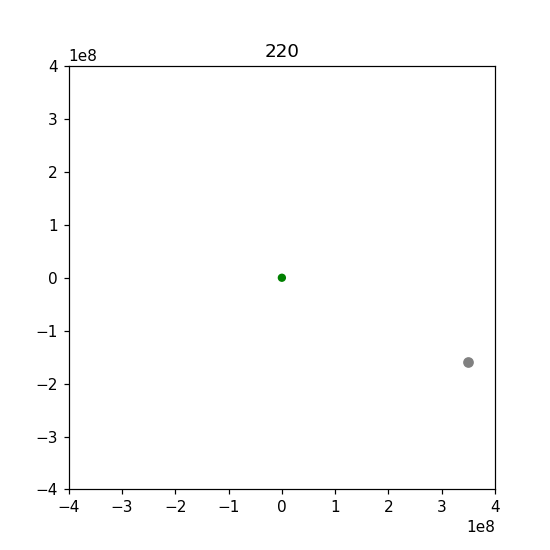

In [270]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

def init():
    
    ax.clear()
    ax.set_xlim(-4e8,4e8)
    ax.set_ylim(-4e8,4e8)
    
def Update(i):
    init()
    
    ax.scatter(xL[::scale][i],yL[::scale][i],color='gray' )
    ax.set_title("{0}".format(i))
    Earth = plt.Circle((0,0),rT,color="green",fill=True)
    ax.add_patch(Earth)
    ax.scatter(xT[::scale][i],yT[::scale][i],marker=".",color="red")
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)

In [54]:
theta = 30*np.pi/180

In [55]:
x,y,z,vx,vy,vz = Integrator2(System,r0,t,omega)

0.02002002002002002


In [56]:
r = integrate.odeint(System,r0,t,args=(omega,))

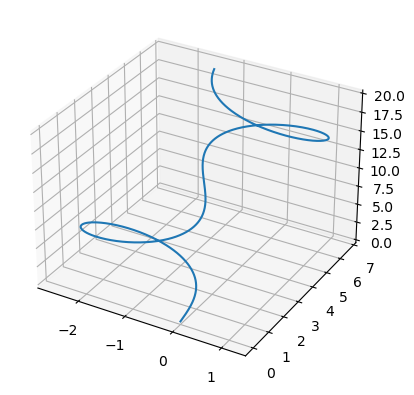

In [58]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
#ax.plot(r[:,0],r[:,1],r[:,2])

In [201]:
def Integrator2(f,R0,t,param):
    
    h = t[1] - t[0]
    print(h)
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    
    p_r = np.zeros_like(t)
    p_phi = np.zeros_like(t)
    
    r[0] = R0[0]
    phi[0] = R0[1]
    p_r[0] = R0[2]
    p_phi[0] = R0[4]

    for i in range(1,len(t)):
        
        R = np.array([r[i-1],phi[i-1],p_r[i-1],p_phi[i-1]])
        
        K1 = f(R,t[i-1],param)
        
        R = np.array([r[i-1]+0.5*h*K1[0],phi[i-1]+0.5*h*K1[1],
                      p_r[i-1]+0.5*h*K1[2],p_phi[i-1]+0.5*h*K1[3]])
        
        K2 = f(R,t[i-1]+0.5*h,param)
        
        R = np.array([x[i-1]+0.5*h*K2[0],y[i-1]+0.5*h*K2[1],z[i-1]+0.5*h*K2[2],
                      vx[i-1]+0.5*h*K2[3],vy[i-1]+0.5*h*K2[4],vz[i-1]+0.5*h*K2[5]])
        
        K3 = f(R,t[i-1]+0.5*h,param)
        
        R = np.array([x[i-1]+h*K3[0],y[i-1]+h*K3[1],z[i-1]+h*K3[2],
                      vx[i-1]+h*K3[3],vy[i-1]+h*K3[4],vz[i-1]+h*K3[5]])
        
        K4 = f(R,t[i-1]+h,param)
        
        x[i] = x[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        y[i] = y[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        z[i] = z[i-1] + (1/6)*h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
        
        vx[i] = vx[i-1] + (1/6)*h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
        vy[i] = vy[i-1] + (1/6)*h*(K1[4]+2*K2[4]+2*K3[4]+K4[4])
        vz[i] = vz[i-1] + (1/6)*h*(K1[5]+2*K2[5]+2*K3[5]+K4[5])
        
    return x,y,z,vx,vy,vz